In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score # 导入轮廓系数指标
from sklearn.cluster import KMeans # KMeans模块
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [34]:
#加载样本数据：Hair-cleanYesNo.csv
data = pd.read_csv('./Hair-cleanYesNo.csv')
data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [35]:
#保留一份原始数据:data
op_data = data.copy()
op_data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [36]:
#检测哪些列出现缺失值
op_data.isnull().any()

Id                          False
Genetics                    False
Hormonal_Changes            False
Medical_Conditions          False
Medications_Treatments      False
Nutritional_Deficiencies    False
Stress                      False
Age                         False
Poor_Hair_Care_Habits       False
Environmental_Factors       False
Smoking                     False
Weight_Loss                 False
Hair Loss                   False
dtype: bool

In [37]:
#检测是否出现重复的行数据
op_data.duplicated().sum()

0

In [38]:
# 删除无用id列
op_data.drop('Id', axis = 1, inplace= True)
op_data.head()

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [39]:
op_data.head()

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


<Axes: >

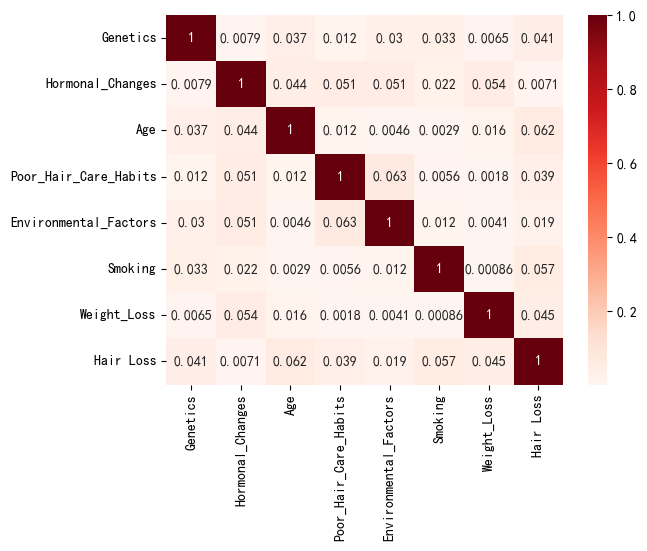

In [40]:
import seaborn as sns
normal_cols = ['Genetics','Hormonal_Changes','Age','Poor_Hair_Care_Habits','Environmental_Factors','Smoking','Weight_Loss','Hair Loss']
corr = op_data[normal_cols].corr().abs()
sns.heatmap(corr,cmap='Reds',annot=True)

## 特征值化

In [42]:
# 非可以分大小的特征使用one-hot转换
cols=["Medical_Conditions","Medications_Treatments","Nutritional_Deficiencies"]
ret = pd.get_dummies(op_data[cols])
new_data = pd.concat((op_data,ret),axis=1).drop(columns=cols)
# 根据字典进行特征值化
# 压力替换数字表示
dic_stress = {
    'Low':1,
    'Moderate':2,
    'High':3
}
new_data['Stress'] = new_data['Stress'].map(dic_stress)
cols.append("Stress")

In [43]:
# 无量纲化处理
from sklearn.preprocessing import MinMaxScaler
tool = MinMaxScaler()
ret = tool.fit_transform(op_data[normal_cols])
#将ret封装成DataFrame
from pandas import DataFrame
mm_df = DataFrame(data=ret,columns=normal_cols)
mm_df

,Genetics,Hormonal_Changes,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,1.0,0.0,0.03125,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.78125,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.25000,1.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.87500,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.37500,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
994,1.0,0.0,0.46875,1.0,1.0,1.0,1.0,1.0
995,1.0,1.0,0.90625,0.0,0.0,0.0,1.0,0.0
996,0.0,1.0,0.06250,1.0,0.0,1.0,1.0,1.0
997,0.0,1.0,0.43750,1.0,1.0,1.0,1.0,1.0


In [44]:
new_data.head()

,Genetics,Hormonal_Changes,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss,Medical_Conditions_Alopecia Areata,...,Nutritional_Deficiencies_Iron deficiency,Nutritional_Deficiencies_Magnesium deficiency,Nutritional_Deficiencies_No Data,Nutritional_Deficiencies_Omega-3 fatty acids,Nutritional_Deficiencies_Protein deficiency,Nutritional_Deficiencies_Selenium deficiency,Nutritional_Deficiencies_Vitamin A Deficiency,Nutritional_Deficiencies_Vitamin D Deficiency,Nutritional_Deficiencies_Vitamin E deficiency,Nutritional_Deficiencies_Zinc Deficiency
0,1,0,2,19,1,1,0,0,0,False,...,False,True,False,False,False,False,False,False,False,False
1,0,0,3,43,1,1,0,0,0,False,...,False,True,False,False,False,False,False,False,False,False
2,0,0,2,26,1,1,0,1,0,False,...,False,False,False,False,True,False,False,False,False,False
3,1,1,2,46,1,1,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,2,30,0,1,1,0,1,False,...,True,False,False,False,False,False,False,False,False,False


In [45]:
#将无量纲化后的结果和原始表格中剩余的one-hot结果后的数据进行横向级联拼接
df = pd.concat((mm_df,new_data.drop(columns=normal_cols,inplace=False)),axis=1)
#df中保存的就是经过了无量纲化之后的数据
df.head()

,Genetics,Hormonal_Changes,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss,Stress,Medical_Conditions_Alopecia Areata,...,Nutritional_Deficiencies_Iron deficiency,Nutritional_Deficiencies_Magnesium deficiency,Nutritional_Deficiencies_No Data,Nutritional_Deficiencies_Omega-3 fatty acids,Nutritional_Deficiencies_Protein deficiency,Nutritional_Deficiencies_Selenium deficiency,Nutritional_Deficiencies_Vitamin A Deficiency,Nutritional_Deficiencies_Vitamin D Deficiency,Nutritional_Deficiencies_Vitamin E deficiency,Nutritional_Deficiencies_Zinc Deficiency
0,1.0,0.0,0.03125,1.0,1.0,0.0,0.0,0.0,2,False,...,False,True,False,False,False,False,False,False,False,False
1,0.0,0.0,0.78125,1.0,1.0,0.0,0.0,0.0,3,False,...,False,True,False,False,False,False,False,False,False,False
2,0.0,0.0,0.25000,1.0,1.0,0.0,1.0,0.0,2,False,...,False,False,False,False,True,False,False,False,False,False
3,1.0,1.0,0.87500,1.0,1.0,0.0,0.0,0.0,2,False,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.37500,0.0,1.0,1.0,0.0,1.0,2,False,...,True,False,False,False,False,False,False,False,False,False


# 建模
通过平均轮廓系数检验得到最佳KMeans聚类模型

In [46]:
#按照之前找寻最优模型超参数的套路实现
ks = [2,3,4,5,6,7] #簇的个数的取值
scores = [] #保存模型对应不同的簇的轮廓系数的值
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(new_data)
    score = silhouette_score(new_data,model.labels_)
    scores.append(score)
ks = np.array(ks)
scores = np.array(scores)

best_index = np.argmax(scores)
best_k = ks[best_index]
best_k

d:\programs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\programs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\programs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\programs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

2

In [47]:
#建模：
model = KMeans(n_clusters=best_k)
model.fit(new_data)
#获取每一个样本聚类的结果
labels = model.labels_

d:\programs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### 聚类结果特征分析与展示
通过上面模型，我们其实给每个观测（样本）打了个标签clusters，即他属于4类中的哪一类,将原始数据与聚类标签整合

In [48]:
data['cluster'] = labels
data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss,cluster
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0,1
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0,1
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1,0


In [49]:
data['cluster'].value_counts().sort_index()

cluster
0    508
1    491
Name: count, dtype: int64

In [50]:
all_value_data = [] #存储数值型特征的显著特征
all_str_data = [] #存储非数值型特征的显著特征

for k in range(2):#k的取值为0-3刚好可以作为每一个簇的标号
    #提取每一个簇对应的样本数据
    label_df = data.loc[data['cluster'] == k]
    #提取每一个簇中数值型特征的显著特征（每一个维度特征都需要进行显著特征的提取）
    value_s = label_df[normal_cols].describe().loc['mean']
    #将每一个簇对应数值型特征的显著特征存储到all_value_data
    all_value_data.append(value_s)
    
    #处理每一个簇中非数值型列的显著特征
    str_s = label_df[cols].describe().loc['top']
    all_str_data.append(str_s)

In [51]:
#每一个簇对应的样本数量计算出来
df_cluster_count = DataFrame(data=data['cluster'].value_counts().sort_index()).T
df_cluster_count

cluster,0,1
count,508,491


In [52]:
#数值型特征的显著特征
value_cluster_df = DataFrame(data=all_value_data,index=[0,1]).T
value_cluster_df

,0,1
Genetics,0.537402,0.507128
Hormonal_Changes,0.525591,0.492872
Age,26.265748,42.384929
Poor_Hair_Care_Habits,0.507874,0.476578
Environmental_Factors,0.517717,0.498982
Smoking,0.525591,0.513238
Weight_Loss,0.466535,0.478615
Hair Loss,0.521654,0.472505


In [53]:
#非数值型特征的显著特征
str_cluster_df = DataFrame(data=all_str_data,index=[0,1]).T
str_cluster_df

,0,1
Medical_Conditions,Alopecia Areata,No Data
Medications_Treatments,Antidepressants,Rogaine
Nutritional_Deficiencies,No Data,Zinc Deficiency
Stress,Moderate,Moderate


In [54]:
#将结论进行整体展示
pd.concat((df_cluster_count,value_cluster_df,str_cluster_df),axis=0)

,0,1
count,508,491
Genetics,0.537402,0.507128
Hormonal_Changes,0.525591,0.492872
Age,26.265748,42.384929
Poor_Hair_Care_Habits,0.507874,0.476578
Environmental_Factors,0.517717,0.498982
Smoking,0.525591,0.513238
Weight_Loss,0.466535,0.478615
Hair Loss,0.521654,0.472505
Medical_Conditions,Alopecia Areata,No Data
